# (0) RecSys 기초 대회 미션1

Book recommondation Dataset EDA

탐색적 데이터 분석이라고 불리는 EDA (Exploratory Data Analysis)는 수집한 데이터를 다양한 각도에서 관찰하고 이해하는 과정을 말합니다.

기본적으로 데이터를 잘 파악해야 새로운 인사이트를 발견하고, 이를 분석에 활용하여 더 높은 성능을 내기 위한 다양한 실험을 해볼 수 있습니다.

본 미션을 통해 추후 모델의 성능 향상에 도움이 될만한 새로운 아이디어를 떠올릴 수 있는 시간을 갖게 될 것입니다.


# (1) 데이터

RecSys 기초 대회 강의에서는Book Crossing 데이터를 사용하여, 모든 실습 및 미션, 대회를 진행합니다. [Kaggle Book-Crossing](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset) 을 출처로 하며, 데이터는 재구성되어 제공되었습니다. 해당 데이터는 CC0: Public Domain 라이센스임을 밝힙니다.



본 대회에 활용되는 데이터는 총 3개의 파일입니다.

user : 사용자 정보를 담고 있는 데이터 파일

ratings: 책의 등급을 1-10으로 표현한 데이터 파일

books: 책과 관련된 정보를 표현한 데이터 파일

먼저 세 파일을 로드하는 과정을 수행하겠습니다.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17Zbpx_Yn0ggLFVeijUalcnOUt5mCHeEH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17Zbpx_Yn0ggLFVeijUalcnOUt5mCHeEH" -O users.csv && rm -rf ~/cookies.txt
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JIxWPgC8JJkuZaWjk5FJBBKuqSX87HGE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JIxWPgC8JJkuZaWjk5FJBBKuqSX87HGE" -O books.csv && rm -rf ~/cookies.txt
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1B-8lw3a1KPJdhFAMXP58a7taJjpDvfw6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1B-8lw3a1KPJdhFAMXP58a7taJjpDvfw6" -O ratings.csv && rm -rf ~/cookies.txt

--2022-10-28 06:56:04--  https://docs.google.com/uc?export=download&confirm=&id=17Zbpx_Yn0ggLFVeijUalcnOUt5mCHeEH
Resolving docs.google.com (docs.google.com)... 142.251.42.142, 2404:6800:4004:825::200e
Connecting to docs.google.com (docs.google.com)|142.251.42.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cuf0f0c521h85u2l4u6lgj2b243t0nhk/1666940100000/01233170983161563057/*/17Zbpx_Yn0ggLFVeijUalcnOUt5mCHeEH?e=download&uuid=444e3241-6eb3-4abe-8c74-54ce1e642019 [following]
--2022-10-28 06:56:04--  https://doc-08-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cuf0f0c521h85u2l4u6lgj2b243t0nhk/1666940100000/01233170983161563057/*/17Zbpx_Yn0ggLFVeijUalcnOUt5mCHeEH?e=download&uuid=444e3241-6eb3-4abe-8c74-54ce1e642019
Resolving doc-08-58-docs.googleusercontent.com (doc-08-58-docs.googleusercontent.com)... 142.250.196.129, 2404:6800:4

In [71]:
path=''

users = pd.read_csv(path+'users.csv')
books = pd.read_csv(path+'books.csv')
ratings = pd.read_csv(path+'ratings.csv')

print('users shape: ', users.shape)
print('books shape: ', books.shape)
print('ratings shape: ', ratings.shape)

users shape:  (14348, 3)
books shape:  (27013, 10)
ratings shape:  (164729, 3)



> 1.   users.csv
> 2.   books.csv
> 3.   ratings.csv

순서대로 EDA를 진행해 보겠습니다.

각 데이터 셋을 열어 데이터를 꼼꼼히 살펴보며 cleaning 을 수행해보고, 간단한 Feature Engineering을 통해 인사이트를 탐색해보겠습니다.

#(2) users

사용자의 정보를 담고 있는 파일입니다.

총 70753 명의 사용자 정보를 담고 있습니다.

`user_id`, `location`, `age` 컬럼으로 구성되어있습니다.

`user_id`는 unique한 값을 나타냅니다.


In [72]:
users.head()

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


In [73]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14348 entries, 0 to 14347
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   14348 non-null  int64  
 1   location  14348 non-null  object 
 2   age       9847 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 336.4+ KB


In [74]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,14348.0,138807.732855,80410.989584,8.0,68715.75,138085.0,208687.25,278854.0
age,9847.0,36.022748,12.785329,5.0,27.00,34.0,44.00,97.0


In [75]:
users['user_id'].nunique()

14348

In [76]:
users.isna().sum()/len(users)

user_id     0.000000
location    0.000000
age         0.313702
dtype: float64

age에 많은 결측값이 있는 것을 확인할 수 있습니다.

## (2-1) Preprocessing & Feature Engineering

현재 `location` 칼럼에는 지역, 주, 국가 순서로 모든 정보가 다 들어와있습니다.

이를 전처리를 통해 각각 컬럼으로 분리하는 과정을 거치겠습니다.

In [77]:
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거

users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

/tmp/ipykernel_11126/3844664685.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거


In [78]:
users.head()

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,timmins,ontario,canada
1,11400,"ottawa,ontario,canada",49.0,ottawa,ontario,canada
2,11676,"na,na,na",NaN,NaN,NaN,NaN
3,67544,"toronto,ontario,canada",30.0,toronto,ontario,canada
4,85526,"victoria,britishcolumbia,canada",36.0,victoria,britishcolumbia,canada


In [79]:
users.isna().sum()

user_id                0
location               0
age                 4501
location_city         35
location_state       683
location_country     585
dtype: int64

In [80]:
users[users['location_country'].isna()]

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
6,116866,"ottawa,,",NaN,ottawa,NaN,NaN
29,115097,"seattle,,",27.0,seattle,NaN,NaN
43,245827,"albuquerque,,",NaN,albuquerque,NaN,NaN
59,226745,"humble,,",38.0,humble,NaN,NaN
...,...,...,...,...,...,...
14051,56135,"birmingham,,",NaN,birmingham,NaN,NaN
14079,172962,"laronge,,",NaN,laronge,NaN,NaN
14105,200408,"toulouse,hautegaronne,",22.0,toulouse,hautegaronne,NaN
14136,69147,"glasgow,scotland,",34.0,glasgow,scotland,NaN


country가 결측값인 일부 행을 살펴보면 city값이 존재하는데, country 정보가 없는 경우가 있습니다.

따라서 이런 경우를 처리해주도록 하겠습니다.

In [81]:
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values
location = users[(users['location'].str.contains('seattle'))&(users['location_country'].notnull())]['location'].value_counts().index[0]

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

In [82]:
for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

In [83]:
users.isna().sum()

user_id                0
location               0
age                 4501
location_city         35
location_state       278
location_country     137
dtype: int64

location_state와 location_country의 결측값이 줄어든 것을 확인할 수 있습니다.

## (2-2) 시각화
데이터 시각화를 통해 사용자들의 나이 분포, 거주 국가 등을 알아보겠습니다.

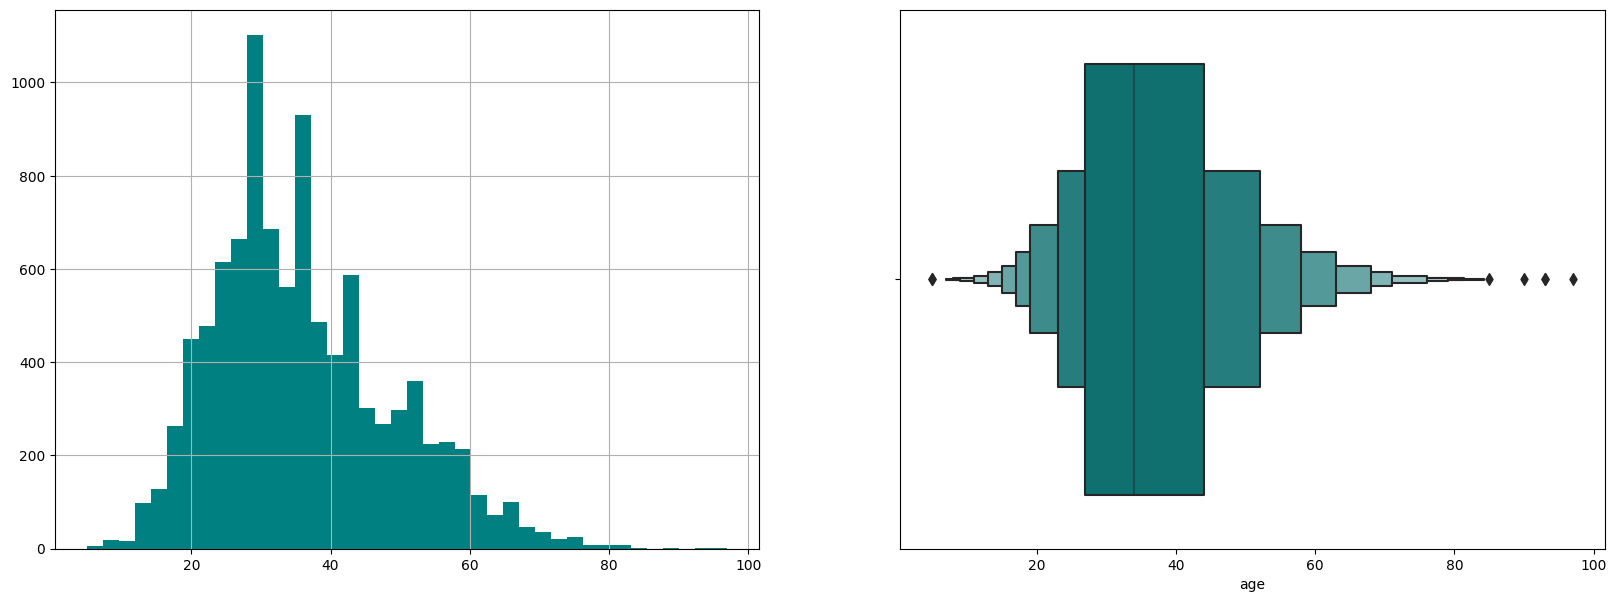

In [84]:
# 나이 분포
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

users['age'].hist(bins=40, color='teal', ax=ax[0])
sns.boxenplot(data=users, x='age', color='teal',ax=ax[1])

plt.show()

In [85]:
users['age'].value_counts()

29.0    403
33.0    360
30.0    359
32.0    353
26.0    341
       ... 
5.0       2
90.0      1
84.0      1
97.0      1
85.0      1
Name: age, Length: 83, dtype: int64

In [86]:
users['age'].nunique()

83

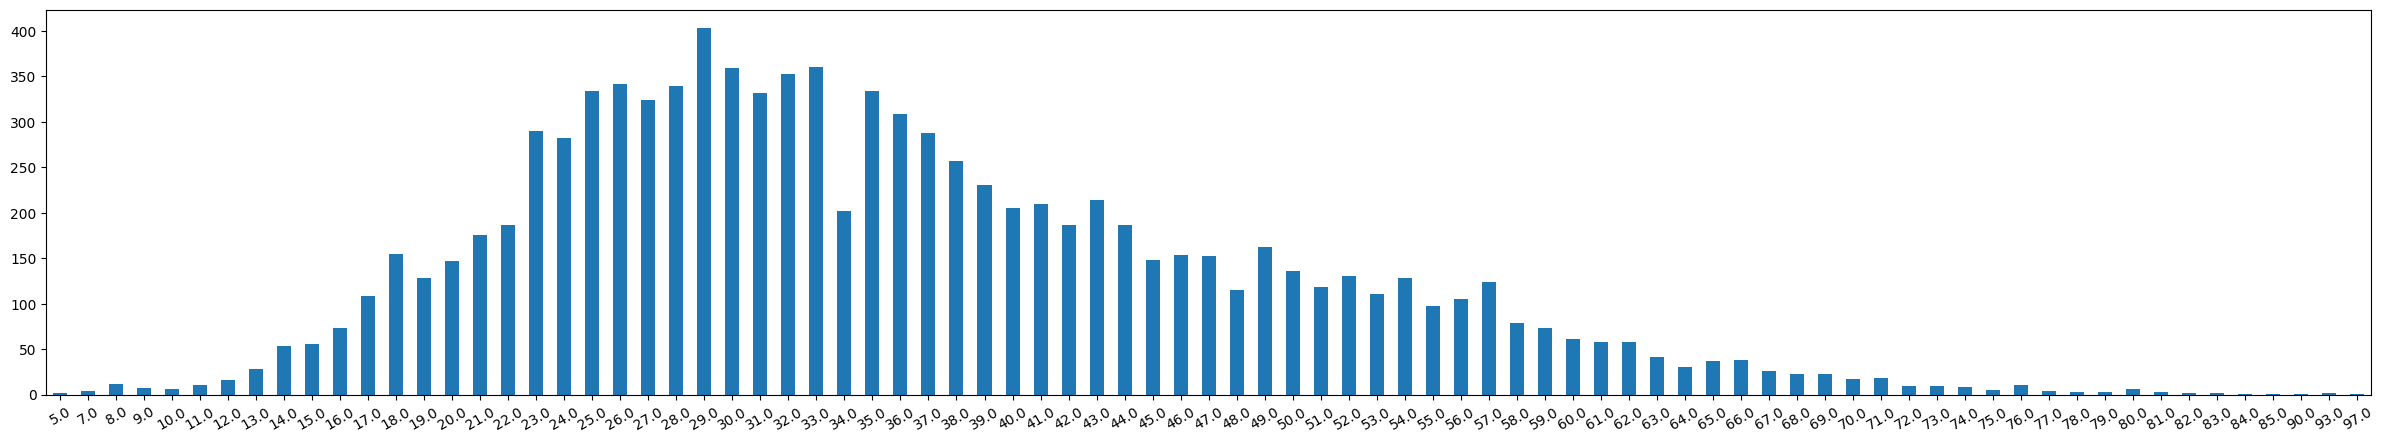

In [87]:
plt.figure(figsize=(30,5))
users['age'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

20대 초반 ~ 30대 중반까지의 사용자가 많은 것을 확인할 수 있습니다.

이번에는 사용자들의 거주 국가를 살펴보고 국가별로 사용자의 분포가 다른지 알아보겠습니다.

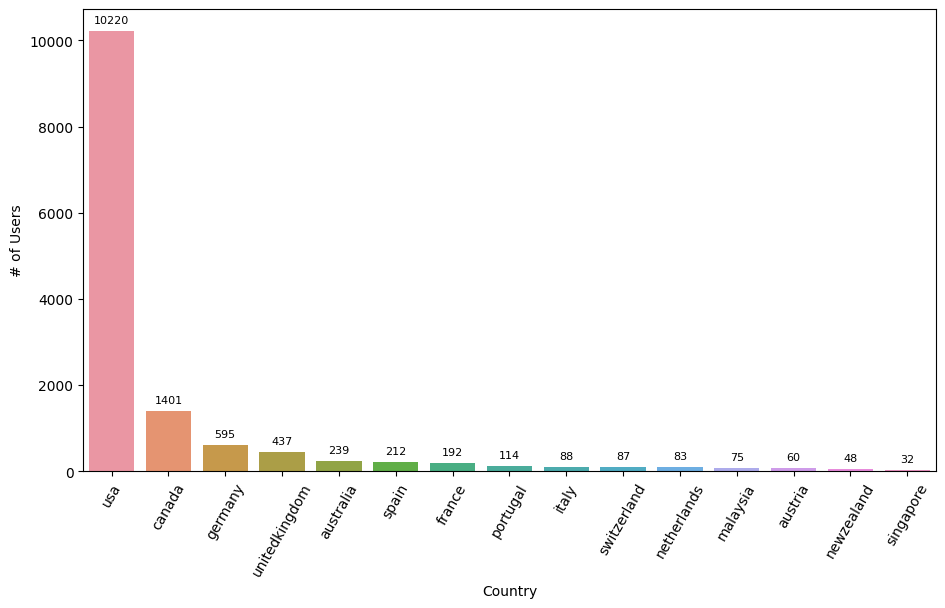

In [88]:
my_dict=(users['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
# f.drop(7,inplace=True)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

사용자의 대다수는 미국에 거주중인 것을 확인할 수 있습니다.

국가별 사용자의 나이대를 알아보겠습니다.



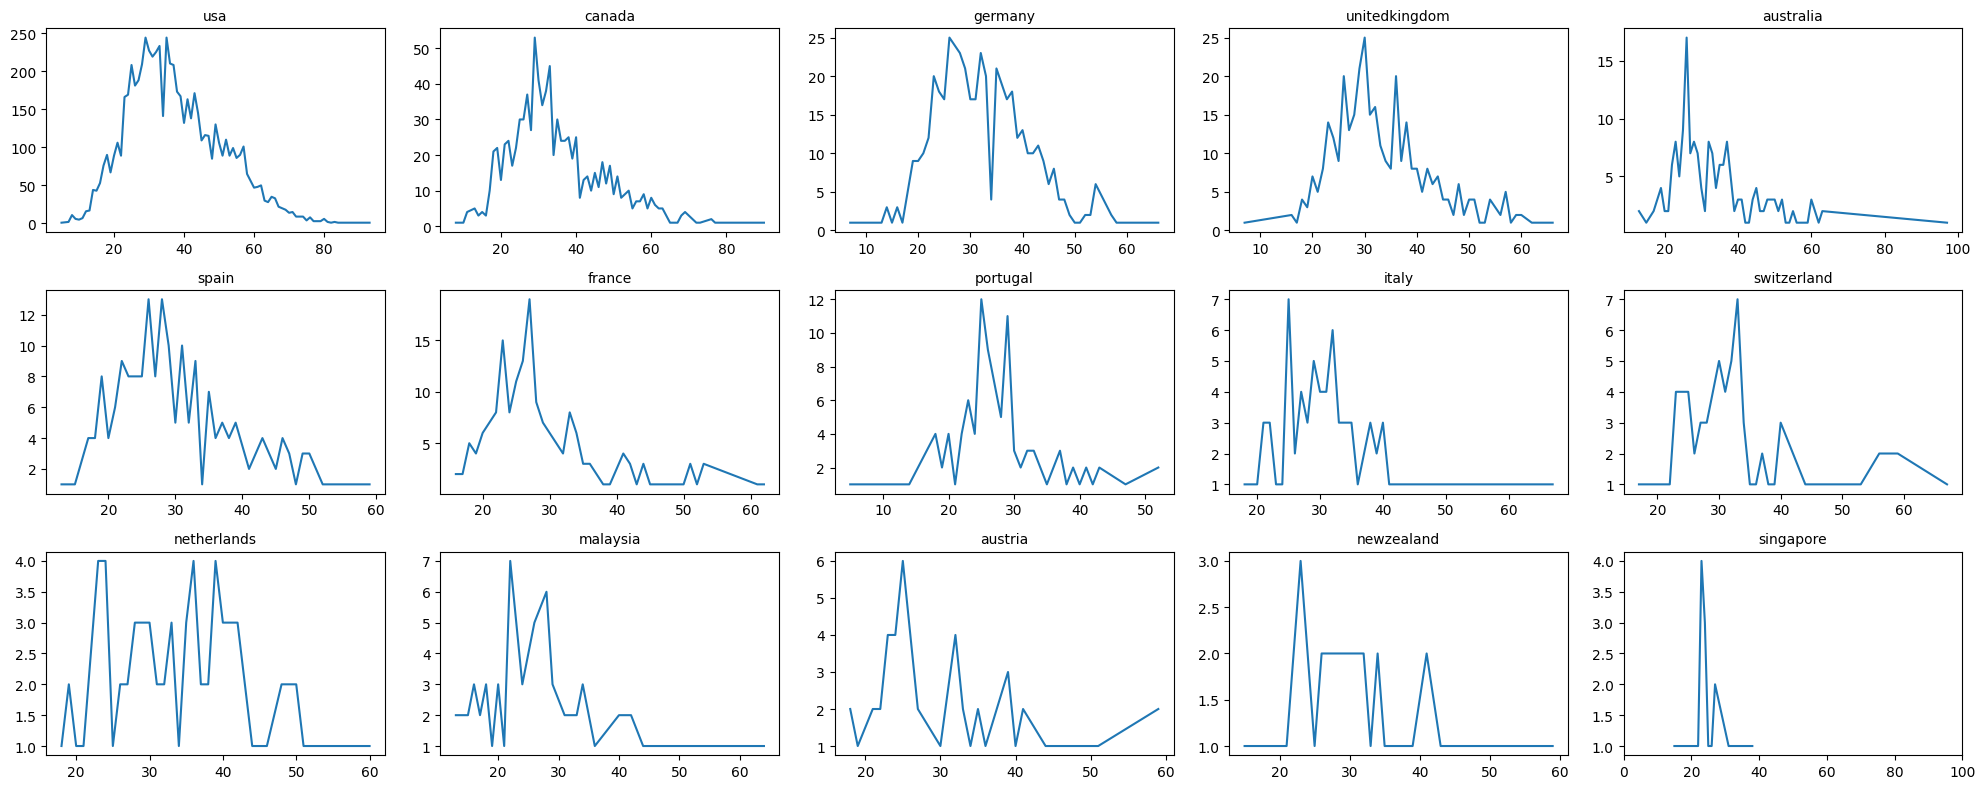

In [89]:
fig, ax = plt.subplots(3,5,figsize=(20,8))
for country, ax_ in zip(f['location_country'], ax.flatten()):
    users[(users['location_country']==country)]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()

대부분 20~30대 사용자가 많지만, 국가별로 사용자의 분포가 약간씩 차이가 있는 것을 확인할 수 있습니다.

age의 결측값을 살펴보겠습니다.

In [90]:
users[users['age'].isna()]['location_country'].value_counts()

usa                  3469
canada                478
germany               131
unitedkingdom          84
australia              57
spain                  24
italy                  18
newzealand             15
portugal               14
france                 13
netherlands            12
switzerland            11
singapore              11
austria                11
malaysia                8
ireland                 8
japan                   6
sweden                  6
romania                 4
belgium                 4
greece                  3
brazil                  2
china                   2
euskalherria            2
mexico                  2
hongkong                2
israel                  2
philippines             2
aruba                   2
norway                  1
framingham              1
guernsey                1
unitedstates            1
burma                   1
michigan                1
denmark                 1
laos                    1
universe                1
wales       

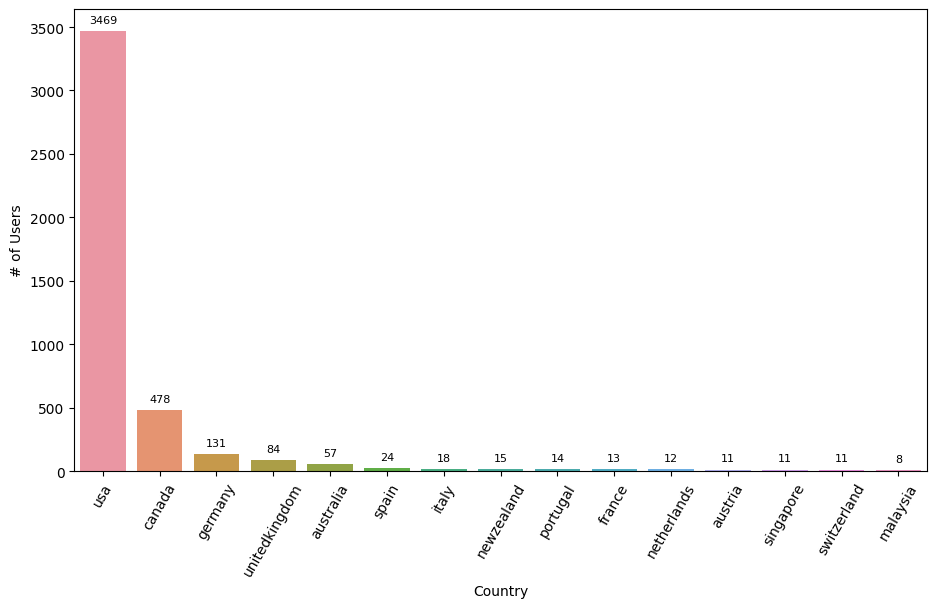

In [91]:
my_dict=(users[users['age'].isna()]['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

위의 그래프와 큰 차이가 없는 점을 고려했을때, 특정국가에 몰려있다기 보단 골고루 결측치가 퍼져 있다고 판단할 수 있습니다.

국가별 평균, 중앙값, 최빈값 등을 넣어볼수도 있고, 국가별로 큰 나이분포에 큰 차이가 없다고 판단한 경우 전체의 통계치로 채울 수도 있습니다.

또는 결측값을 평균, 중앙값, 최빈값 등의 값으로 채우지 않고 결측값 자체로 가져가는 방법도 있습니다. 

다양한 방법을 시도해보시기 바랍니다.

In [92]:
users = users.drop(columns='location')

# (3) books
이제 책에 대한 정보를 살펴보겠습니다.

`isbn`, `book_title`, `book_author`, `year_of_publication`, `publisher`, `img_s', `img_m`, `img_l`, `language`, `category` 칼럼으로 이뤄져있습니다.

`isbn`은 책의 고유 코드를 나타냅니다

같은 title을 가진 책이더라도 발행 년도, 출판사, 언어 등에 따라 책 코드가 다를 수 있습니다.


In [93]:
books.shape

(27013, 10)

In [94]:
books['isbn'].nunique()

27013

In [95]:
books['book_title'].nunique()

24517

In [96]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],images/___000001___0002005018.01.THUMBZZZ.jpg,"In a small town in Canada, Clara Callan reluct..."
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],images/___000003___0374157065.01.THUMBZZZ.jpg,"Describes the great flu epidemic of 1918, an o..."
2,0771074670,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,en,['Fiction'],images/___000010___0771074670.01.THUMBZZZ.jpg,Another story based in the fictional rural tow...
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.0...,NaN,NaN,images/___000014___1558746218.01.THUMBZZZ.jpg,NaN
4,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],images/___000018___0440234743.01.THUMBZZZ.jpg,"A suicidal billionaire, a burnt-out Washington..."


In [97]:
books.isna().sum() #language, category, summary에 결측값이 있습니다

isbn                      0
book_title                0
book_author               0
year_of_publication       0
publisher                 0
img_url                   0
language               8932
category               9066
img_path                  0
summary                8932
dtype: int64

In [98]:
books[books['language'].isna() & books['summary'].notnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary


In [99]:
books[books['language'].notnull() & books['summary'].isna()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary


In [100]:
books[books['language'].isna() & books['category'].notnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary


In [101]:
books[books['language'].notnull() & books['category'].isna()] 

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary
89,2070567842,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,1994.0,Gallimard-Jeunesse,http://images.amazon.com/images/P/2070567842.0...,fr,NaN,images/___000154___2070567842.01.THUMBZZZ.jpg,Un petit garçon se pose énormément de question...
115,3596292646,Das Buch der lÃ?Â¤cherlichen Liebe.,Milan Kundera,2000.0,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596292646.0...,de,NaN,images/___000217___3596292646.01.THUMBZZZ.jpg,Die im &#39;Buch der lächerlichen Liebe&#39; v...
682,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...,en,NaN,images/___001173___0345339711.01.THUMBZZZ.jpg,"Thus continues the magnificent, bestselling ta..."
786,0440219078,The Giver (21st Century Reference),LOIS LOWRY,1994.0,Laure Leaf,http://images.amazon.com/images/P/0440219078.0...,en,NaN,images/___001366___0440219078.01.THUMBZZZ.jpg,"Ethan Frome, a New England villager, is tormen..."
793,349913358X,Das Schlampenbuch. ErzÃ?Â¤hlungen. ( neue frau).,Milena Moser,1993.0,Rowohlt Tb.,http://images.amazon.com/images/P/349913358X.0...,de,NaN,images/___001381___349913358X.01.THUMBZZZ.jpg,"Grotesk bissige Erzählungen über Frauen, die k..."
...,...,...,...,...,...,...,...,...,...,...
26060,2841871991,Popcorn,Ben Elton,1999.0,L'Archipel,http://images.amazon.com/images/P/2841871991.0...,en,NaN,images/___129221___2841871991.01.THUMBZZZ.jpg,Les films de Delamitri exaltent la violence en...
26514,3404148371,Epsilon.,David Ambrose,2003.0,LÃ?Â¼bbe,http://images.amazon.com/images/P/3404148371.0...,de,NaN,images/___146470___3404148371.01.THUMBZZZ.jpg,Als Spezialagent Charlie Monk einen Observieru...
26891,3442355915,Das Totenhaus.,Linda Fairstein,2002.0,Goldmann,http://images.amazon.com/images/P/3442355915.0...,de,NaN,images/___172917___3442355915.01.THUMBZZZ.jpg,"Amerikanische Autorin, geb. 1947."
26913,3442091411,Tuareg. Roman.,Alberto Vazquez-Figueroa,1989.0,Goldmann,http://images.amazon.com/images/P/3442091411.0...,nl,NaN,images/___176468___3442091411.01.THUMBZZZ.jpg,Nadat een groep soldaten de wet van de gastvri...


language는 있지만 category가 결측인 경우는 존재합니다.

language가 결측값인 경우, summary도 결측값인 것을 확인할 수 있습니다.

## (3-1) Preprocessing & Feature Engineering

books의 경우 데이터를 다양한 방법으로 수정하여 여러 테스트를 해볼 수 있을 것으로 예상됩니다.

본 미션의 내용 이외에 다양한 시도를 해보고 성능을 측정해보시기 바랍니다.



### (3-1-1) isbn

먼저 isbn과 img_url, img_path의 연관성을 찾을 수 있습니다.

`isbn`과 img_path, img_url 모두 동일한지 살펴보는 작업을 거치고 isbn의 성질을 이용하여 전처리를 진행해보겠습니다.

In [102]:
books[books['isbn'] != books['img_url'].apply(lambda x: x.split('P/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary


In [103]:
books[books['isbn']!=books['img_path'].apply(lambda x: x.split('___')[2][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary


모두 동일하여 추가적인 작업이 필요없음을 확인했습니다.


isbn은 책의 개별적인 고유번호를 나타내는 10자리 숫자입니다.

출판 국가, 출판사 번호, 항목 번호, 확인 숫자 순서로 구성되며 확인 숫자의 경우 10을 나타내는 X가 오기도 합니다.

이 번호를 활용하여 출판사의 항목 갯수를 줄여보도록 하겠습니다.

In [104]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

publisher_count_df = publisher_count_df.sort_values(by=['count'], ascending = False)

In [105]:
publisher_count_df.head()

,publisher,count
0,Harlequin,793
1,Ballantine Books,784
2,Avon,783
3,Berkley Publishing Group,738
4,Pocket,733


In [106]:
books[books['publisher']=="Penguin Books"]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary
41,0140067477,The Tao of Pooh,Benjamin Hoff,1983.0,Penguin Books,http://images.amazon.com/images/P/0140067477.0...,en,['Humor'],images/___000079___0140067477.01.THUMBZZZ.jpg,An expert in Chinese philosophy explains facet...
100,0140250964,Snow Angels,Stewart O'Nan,1995.0,Penguin Books,http://images.amazon.com/images/P/0140250964.0...,en,['Fiction'],images/___000176___0140250964.01.THUMBZZZ.jpg,Weaves together two stories in the account of ...
118,0140272100,Vanished,Mary McGarry Morris,1997.0,Penguin Books,http://images.amazon.com/images/P/0140272100.0...,en,['Fiction'],images/___000220___0140272100.01.THUMBZZZ.jpg,Aubrey Wallace is the kind of man no one notices.
214,014028009X,Bridget Jones's Diary,Helen Fielding,1999.0,Penguin Books,http://images.amazon.com/images/P/014028009X.0...,en,['Fiction'],images/___000327___014028009X.01.THUMBZZZ.jpg,This witty national bestseller is now availabl...
215,0140298479,Bridget Jones: The Edge of Reason,Helen Fielding,2001.0,Penguin Books,http://images.amazon.com/images/P/0140298479.0...,NaN,NaN,images/___000328___0140298479.01.THUMBZZZ.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...
26803,0140443339,The Oresteia (Penguin Classics),Aeschylus,1984.0,Penguin Books,http://images.amazon.com/images/P/0140443339.0...,en,['Drama'],images/___165212___0140443339.01.THUMBZZZ.jpg,A trilogy of plays dramatizes the murder of Ag...
26834,0140245545,Who Dropped Peter Pan?: A Jocelyn O'Roarke Mys...,Jane Dentinger,1996.0,Penguin Books,http://images.amazon.com/images/P/0140245545.0...,NaN,NaN,images/___167705___0140245545.01.THUMBZZZ.jpg,NaN
26938,0140254277,The Concubine's Children,Denise Chong,1996.0,Penguin Books,http://images.amazon.com/images/P/0140254277.0...,NaN,NaN,images/___180068___0140254277.01.THUMBZZZ.jpg,NaN
26981,0141001895,The Soul of a Chef: The Journey Toward Perfection,Michael Ruhlman,2001.0,Penguin Books,http://images.amazon.com/images/P/0141001895.0...,NaN,NaN,images/___193825___0141001895.01.THUMBZZZ.jpg,NaN


유명출판사를 조회하여 보면 isbn의 시작이 모두 0140으로 시작하는 것을 확인할 수있습니다. 

그러나 표기 방법의 차이 및 오타로 인해 같은 그룹으로 묶이지 못하는 항목이 있습니다.

이런 항목을 수정해보겠습니다.

In [107]:
books['publisher'].nunique() # 수정전 항목 수를 확인합니다.

1507

In [108]:
books[books['isbn'].apply(lambda x: x[:4])=='0140']['publisher'].unique()

array(['Penguin Books', 'Penguin Books Ltd', 'Puffin Books',
       'Penguin USA (Paper)', 'Penguin Putnam~trade', 'Penguin USA',
       'Penguin Putnam~mass', 'Viking Books', 'Penguin Uk',
       'Scott Foresman (Pearson K-12)',
       'Penguin Putnam Books for Young Readers',
       'French & European Pubns', 'Penguin (Non-Classics)',
       'Penguin U S A', 'Penguin Books, Limited (UK)',
       'Hyperion Books for Children', 'Penguin Putnam',
       'Penguin Books Australia Ltd.', 'Viking Penguin Inc', 'Penguin',
       'Viking Press', 'Penguin Audiobooks', 'Compass Books',
       'South Asia Books', 'Penguin/Puffin Mass Market',
       'Penguin Books (NZ) Ltd', 'Ballantine Books', 'Speak',
       'Penguin Books Australia Ltd'], dtype=object)

In [109]:
modify_list = publisher_count_df[publisher_count_df['count']>1].publisher.values

In [110]:
for publisher in modify_list:
    try:
        number = books[books['publisher']==publisher]['isbn'].apply(lambda x: x[:4]).value_counts().index[0]
        right_publisher = books[books['isbn'].apply(lambda x: x[:4])==number]['publisher'].value_counts().index[0]
        books.loc[books[books['isbn'].apply(lambda x: x[:4])==number].index,'publisher'] = right_publisher
    except: 
        pass

In [111]:
books['publisher'].nunique() #수정 후 출판사 갯수입니다

534

### (3-1-2) Category

category를 칼럼의 항목을 대괄호 밖으로 빼는 과정을 거친 뒤 어떤 category가 있는지 살펴보겠습니다

In [112]:
import re
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

In [113]:
books['category'].value_counts()

Fiction                                                                     12118
Juvenile Fiction                                                             1310
Biography Autobiography                                                       693
Humor                                                                         314
History                                                                       178
                                                                            ...  
Frankenstein Fictitious character                                               1
Baltimore Md                                                                    1
Biography                                                                       1
Brain                                                                           1
Bevölkerungsstruktur Bevölkerungsentwicklung Bevölkerungsprognose Kanada        1
Name: category, Length: 739, dtype: int64

In [114]:
books['category'] = books['category'].str.lower()

In [115]:
books['category'].value_counts()

fiction                                                                     12157
juvenile fiction                                                             1322
biography autobiography                                                       696
humor                                                                         314
history                                                                       180
                                                                            ...  
biography                                                                       1
brain                                                                           1
booksellers and bookselling                                                     1
investments                                                                     1
bevölkerungsstruktur bevölkerungsentwicklung bevölkerungsprognose kanada        1
Name: category, Length: 730, dtype: int64

In [116]:
category_df = pd.DataFrame(books['category'].value_counts()).reset_index()
category_df.columns = ['category','count']
category_df.head()

,category,count
0,fiction,12157
1,juvenile fiction,1322
2,biography autobiography,696
3,humor,314
4,history,180


In [117]:
category_df[category_df['count']>=10]

,category,count
0,fiction,12157
1,juvenile fiction,1322
2,biography autobiography,696
3,humor,314
4,history,180
5,religion,161
6,family relationships,140
7,body mind spirit,139
8,self help,136
9,social science,126


카테고리를 보면 3000개가 넘는 종류를 갖고 있습니다.

그러나 이 중 10개 이상의 중복을 갖는 카테고리가 50개가 안되는것을 통해, 많은 카테고리가 그룹화 안된 채로 존재한다고 볼 수 있습니다.

또한 일부 카테고리의 경우 전기&자서전 카테고리와 전기, 자서전 이렇게 나눠져 있는 경우가 있습니다. 

이러한 카테고리를 좀더 큰 카테고리로 묶어주는 과정을 시도하여 카테고리의 가짓수를 줄일 수 있습니다.

본 과정은 여러분들이 EDA를 진행하는 과정에서 더 많은 시도를 해볼 수 있을 것으로 생각됩니다.


상위 카테고리를 만들어보겠습니다.

In [118]:
books['category_high'] = books['category'].copy()
books.loc[books[books['category']=='biography'].index, 'category_high'] = 'biography autobiography'
books.loc[books[books['category']=='autobiography'].index,'category_high'] = 'biography autobiography'

하나씩 찾아서 변경하기엔 너무 많은 자료양을 갖고 있습니다. 

따라서 이런식으로 해당 단어를 포함하는 경우 전체를 바꿀 수 있습니다.

In [119]:
books[books['category'].str.contains('history', na=False)]['category'].unique()

array(['history', 'oral history', 'natural history'], dtype=object)

In [120]:
books.loc[books[books['category'].str.contains('history',na=False)].index,'category_high'] = 'history'

이렇게 바꾸기에도 방대한 양을 가지고 있으므로 반복문을 통해 몇가지 카테고리들을 처리하는 예시를 보여드리겠습니다.

In [121]:
categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

In [122]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
category_high_df.head(10)

,category,count
0,fiction,13621
1,biography autobiography,697
2,humor,326
3,history,182
4,religion,161
5,family,142
6,body mind spirit,139
7,self help,136
8,social,127
9,true crime,125


In [123]:
# 5개 이하인 항목은 others로 묶어주도록 하겠습니다.
others_list = category_high_df[category_high_df['count']<5]['category'].values

In [124]:
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'

In [125]:
books['category'].nunique()

730

In [126]:
books['category_high'].nunique()

77

이런식으로 category 가지수를 줄일 수 있습니다.

In [127]:
books.isna().sum()

isbn                      0
book_title                0
book_author               0
year_of_publication       0
publisher                 0
img_url                   0
language               8932
category               9066
img_path                  0
summary                8932
category_high          9066
dtype: int64

데이터를 살펴보다 보면 아래처럼 같은 책으로 여겨지는 항목이 있는 경우가 있습니다.

그러나 책의 고유 번호인 isbn이 다르고, 출판사가 다르므로 설령 같은 책이여도, 다른 국가에서 출판됐을 가능성을 배재할 수 없으므로 language를 채우는 것은 어려워보입니다.

물론, 0446365505 책의 category_high를 fiction으로 수정하는 작업은 해볼 수 있습니다.

뒤의 작업들을 해보면서 category 항목이 중요하다고 여겨지면, 좀더 시간을 들여서 상위 카테고리 지정하여 데이터 전처리 수준을 올릴 수 있을 것입니다.

In [128]:
books[books['book_title'].str.contains("Pleading Guilty")]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary,category_high
2948,0446365505,Pleading Guilty,Scott Turow,1994.0,Warner Books,http://images.amazon.com/images/P/0446365505.0...,NaN,NaN,images/___005949___0446365505.01.THUMBZZZ.jpg,NaN,NaN
16987,0374234574,Pleading Guilty,Scott Turow,1993.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374234574.0...,en,fiction,images/___047864___0374234574.01.THUMBZZZ.jpg,Immediately. Turow&#39;s third novel takes us ...,fiction


## (3-2) 시각화
- 이미지 url 활용

이번에는 이미지를 살펴보겠습니다.
먼저 url를 이용해서 이미지를 불러오는 방법을 알아보겠습니다.

In [129]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

In [130]:
books[books['book_title'].str.contains('Harry')]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,img_path,summary,category_high
285,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439064864.0...,en,juvenile fiction,images/___000450___0439064864.01.THUMBZZZ.jpg,"In Harry Potter and the Chamber of Secrets, th...",fiction
286,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439064872.0...,NaN,NaN,images/___000451___0439064872.01.THUMBZZZ.jpg,NaN,NaN
287,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439136350.0...,en,juvenile fiction,images/___000452___0439136350.01.THUMBZZZ.jpg,During his third year at Hogwarts School for w...,fiction
288,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/0439136369.0...,NaN,NaN,images/___000453___0439136369.01.THUMBZZZ.jpg,NaN,NaN
289,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439139597.0...,en,juvenile fiction,images/___000454___0439139597.01.THUMBZZZ.jpg,The fourth title in the continuing saga includ...,fiction
336,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,Scholastic,http://images.amazon.com/images/P/0590353403.0...,en,juvenile fiction,images/___000519___0590353403.01.THUMBZZZ.jpg,Rescued from the outrageous neglect of his aun...,fiction
743,0767908473,The Sorcerer's Companion: A Guide to the Magic...,ALLAN ZOLA KRONZEK,2001.0,Broadway Books,http://images.amazon.com/images/P/0767908473.0...,en,social science,images/___001252___0767908473.01.THUMBZZZ.jpg,An intriguing look at the centuries old folklo...,social
1651,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/059035342X.0...,en,juvenile fiction,images/___003043___059035342X.01.THUMBZZZ.jpg,Rescued from the outrageous neglect of his aun...,fiction
2357,0807281948,Harry Potter and the Chamber of Secrets (Book ...,J. K. Rowling,1999.0,Albert Whitman & Company,http://images.amazon.com/images/P/0807281948.0...,NaN,NaN,images/___004665___0807281948.01.THUMBZZZ.jpg,NaN,NaN
2358,0807281956,Harry Potter and the Sorcerer's Stone (Book 1 ...,J. K. Rowling,1999.0,Albert Whitman & Company,http://images.amazon.com/images/P/0807281956.0...,NaN,NaN,images/___004666___0807281956.01.THUMBZZZ.jpg,NaN,NaN


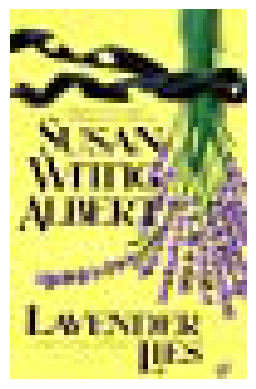

In [131]:
fig= plt.plot(figsize=(3,4))
url = books['img_url'][284]
img = np.asarray(Image.open(requests.get(url, stream=True).raw))
plt.axis("off")
plt.imshow(img)

In [132]:
parameters = {
          'axes.titlesize': 10}
plt.rcParams.update(parameters)

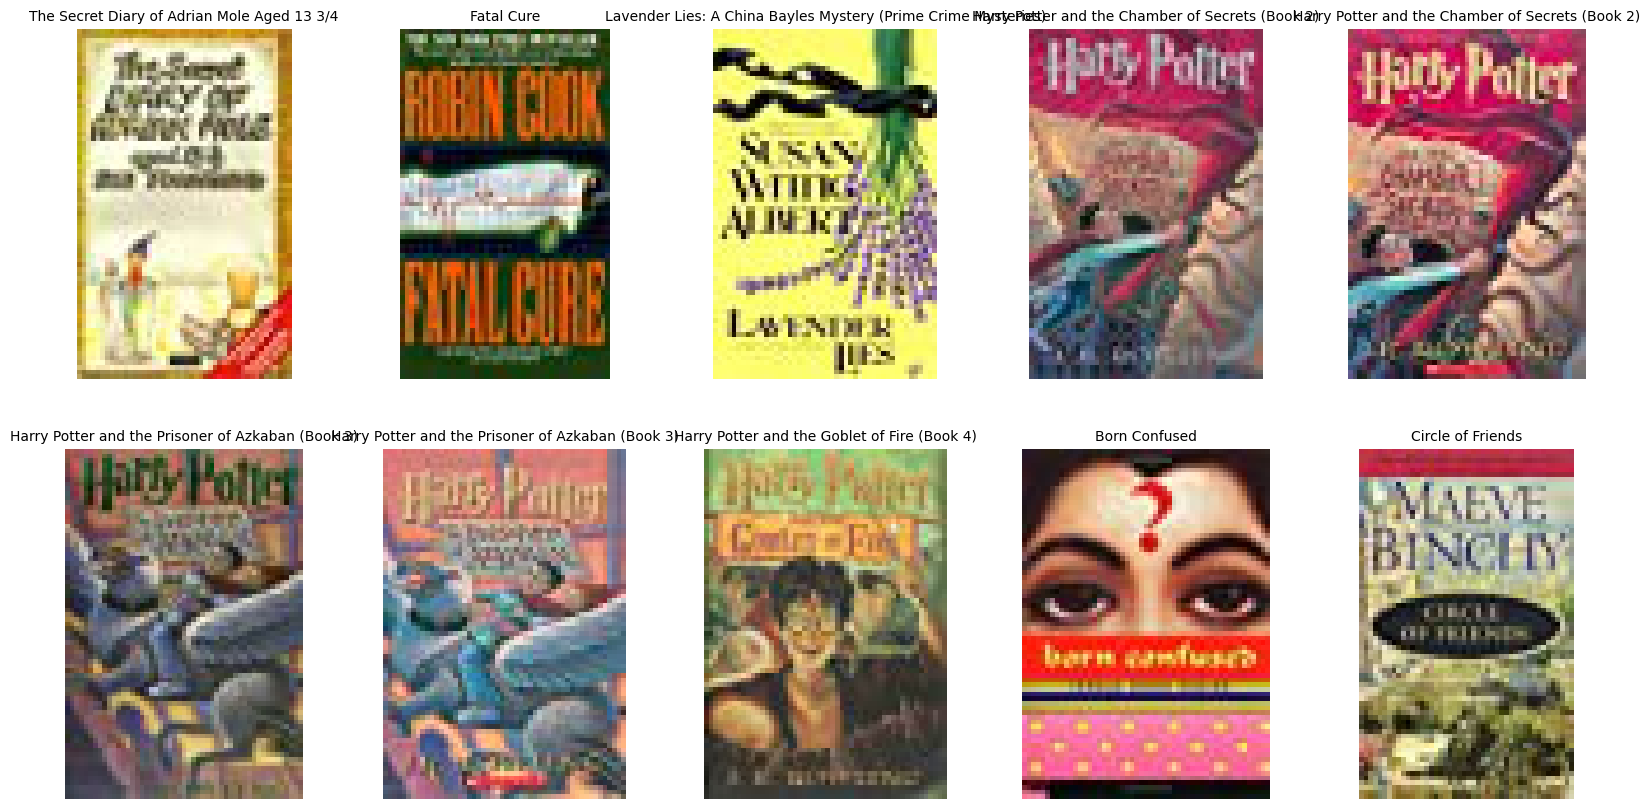

In [133]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10)) 
for i, ax in zip(range(282, 292), ax.flatten()):
    url = books['img_url'][i]
    img = np.asarray(Image.open(requests.get(url, stream=True).raw))
    ax.imshow(img)
    ax.axis("off")
 
    ax.set_title(books['book_title'][i])

fig.show()

- img path 활용

img 파일을 활용해서 불러오는 방법을 알아보겠습니다.

zip 파일을 열고, 관련있는 데이터만 가져와서 사용하겠습니다.

In [134]:
import zipfile
import os

In [135]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn" -O images.zip && rm -rf ~/cookies.txt

--2022-10-28 06:56:41--  https://docs.google.com/uc?export=download&confirm=t&id=19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn
Resolving docs.google.com (docs.google.com)... 142.251.42.142, 2404:6800:4004:825::200e
Connecting to docs.google.com (docs.google.com)|142.251.42.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j91o8b0kl4t5fuekeqv50mjitirjfo84/1666940175000/01233170983161563057/*/19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn?e=download&uuid=4ab2b6e8-66b2-4eca-ab73-c50e990c833a [following]
--2022-10-28 06:56:42--  https://doc-08-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j91o8b0kl4t5fuekeqv50mjitirjfo84/1666940175000/01233170983161563057/*/19Y56g8oGQyUWhrRkjeSeP_ZJvHKRUzbn?e=download&uuid=4ab2b6e8-66b2-4eca-ab73-c50e990c833a
Resolving doc-08-58-docs.googleusercontent.com (doc-08-58-docs.googleusercontent.com)... 142.250.196.129, 2404:6800:

In [136]:
images_zip = zipfile.ZipFile('/content/images.zip')
images_zip.extractall('/content/images')

FileNotFoundError: [Errno 2] No such file or directory: '/content/images.zip'

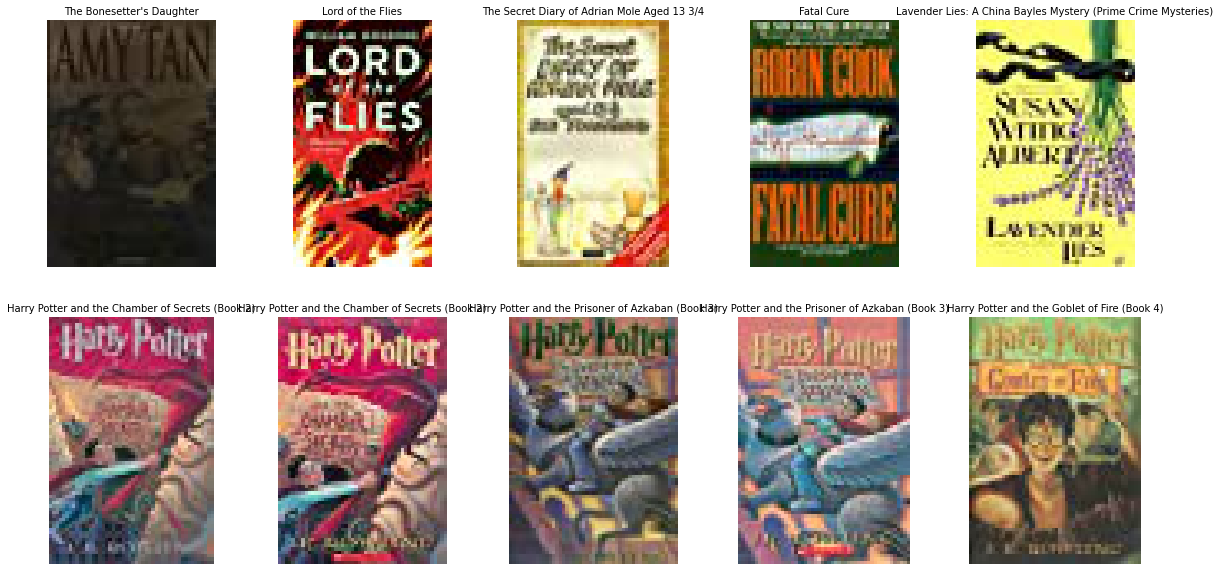

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10)) 
image_path = '/content/'
for i, ax in zip(range(280, 290), ax.flatten()):
    file_path = image_path+books['img_path'][i]
    img = np.asarray(Image.open(file_path))
    ax.imshow(img)
    ax.axis("off")
 
    ax.set_title(books['book_title'][i])

fig.show()

- 그 외 시각화


In [ ]:
books['publisher'].value_counts().head(10)

Pocket                2023
Bantam                1393
Harlequin             1375
Avon                  1126
Ballantine Books      1056
Signet Book           1053
Vintage Books USA     1049
Penguin Books         1048
St. Martin's Press     919
Perennial              875
Name: publisher, dtype: int64

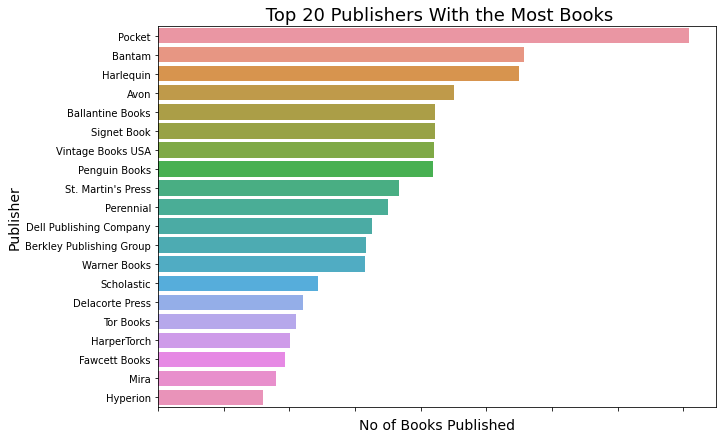

In [ ]:
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])

b = publisher_count_df.sort_values(by=['count'], ascending = False)
b = b.head(20)

fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'publisher' , data = b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)

plt.show()

In [ ]:
print(sorted(books['year_of_publication'].unique()),end=' ') 

[1902.0, 1920.0, 1927.0, 1930.0, 1932.0, 1936.0, 1937.0, 1938.0, 1942.0, 1943.0, 1945.0, 1946.0, 1947.0, 1948.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0] 

1900~2001년까지 출간된 책이 존재하고 있습니다.

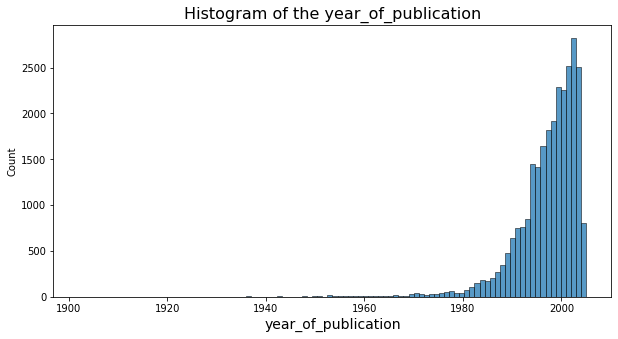

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(books['year_of_publication'],bins=100)
plt.xlabel('year_of_publication',size=14)
plt.title('Histogram of the year_of_publication',size=16)
plt.show()

In [ ]:
books['year_of_publication'].value_counts().sort_index()

1902.0       1
1920.0       1
1927.0       1
1930.0       1
1932.0       1
          ... 
2001.0    2520
2002.0    2826
2003.0    2511
2004.0     802
2005.0       3
Name: year_of_publication, Length: 70, dtype: int64

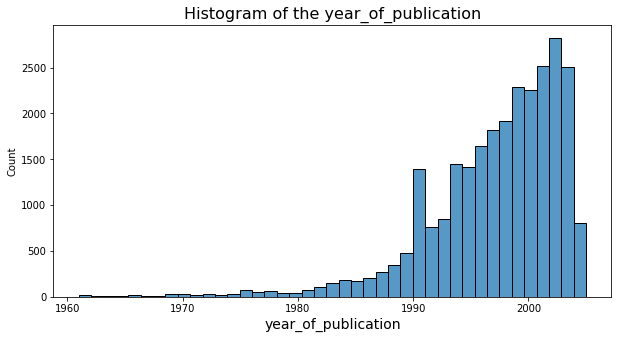

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(books[books['year_of_publication']>1960]['year_of_publication'],bins=41)
plt.xlabel('year_of_publication',size=14)
plt.title('Histogram of the year_of_publication',size=16)
plt.show()

1970년 이전의 책은 몇권 없는 것을 확인할 수 있습니다.

데이터의 책들은 1990년 이후의 책이 대다수입니다.

# (4) ratings

ratings 파일은 사용자가 특정 책을 읽고 점수를 매긴 데이터 입니다.

 `user_id`, `isbn`, `rating` 으로 이뤄져있습니다.

 한 사용자가 다른 책을 여러번 읽기 때문에 중복된 값이 나타나게 되지만,
 
 users에 있는 모든 사용자가 포함된 데이터입니다.

In [ ]:
ratings.head()

,user_id,isbn,rating
0,8,0771074670,1
1,8,0002005018,5
2,17,0684823802,1
3,17,0425099148,7
4,17,0553264990,5


In [ ]:
ratings['user_id'].nunique()

14110

In [ ]:
ratings.shape

(164729, 3)

In [ ]:
ratings['rating'].value_counts(True)

1     0.231040
8     0.186986
10    0.150690
7     0.132017
9     0.130718
5     0.081807
6     0.060378
4     0.013373
3     0.008887
2     0.004104
Name: rating, dtype: float64

rating은 1~10값을 가지며 1이 가장 많습니다.

총 70753명의 사용자들이 평가한 정보가 있습니다.

## (4-1) 시각화

In [ ]:
#유저당 몇 권 정도의 책을 읽었는지 살펴보겠습니다.
ratings.groupby('user_id')['rating'].count().sort_values(ascending=False)

user_id
11676     2901
153662     794
16795      562
95359      427
257204     422
          ... 
80077        1
80404        1
176742       1
80704        1
137678       1
Name: rating, Length: 14110, dtype: int64

유저는 1권에서 6538권까지 책을 읽은 것으로 보입니다.

많은 책을 읽은 유저들의 rating 분포와 그렇지 않은 유저들의 분포를 살펴보겠습니다.

In [ ]:
heavy_users_list = ratings.groupby('user_id')['rating'].count().sort_values(ascending=False).head(20).index

In [ ]:

ratings[ratings['user_id'].isin(heavy_users_list)].groupby('user_id')['rating'].mean()

user_id
11676     7.133747
16795     6.000000
23902     7.563177
35859     6.158209
60244     6.409677
95359     6.618267
98391     8.538012
100906    6.464164
104636    8.194357
107784    3.486577
114368    6.082803
135149    5.996988
153662    6.654912
158295    5.167582
171118    7.024169
185233    3.391447
204864    6.518519
235105    5.029851
248718    6.363636
257204    6.111374
Name: rating, dtype: float64

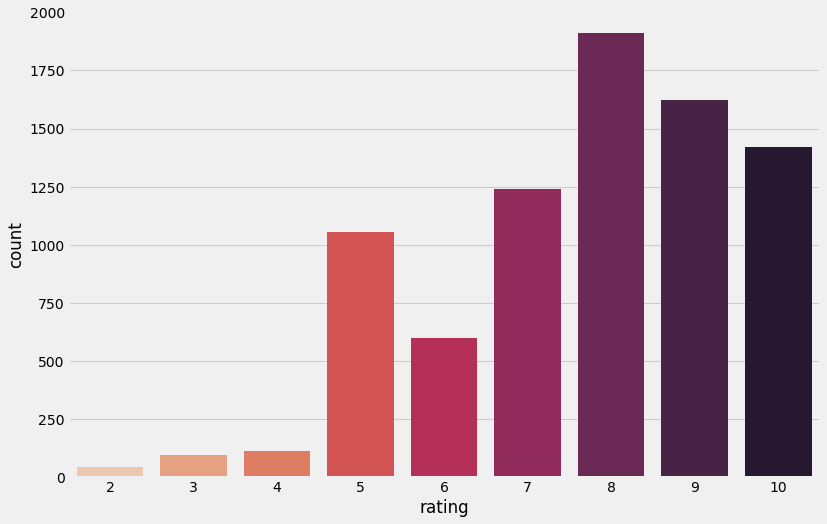

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[(ratings['user_id'].isin(heavy_users_list))&(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

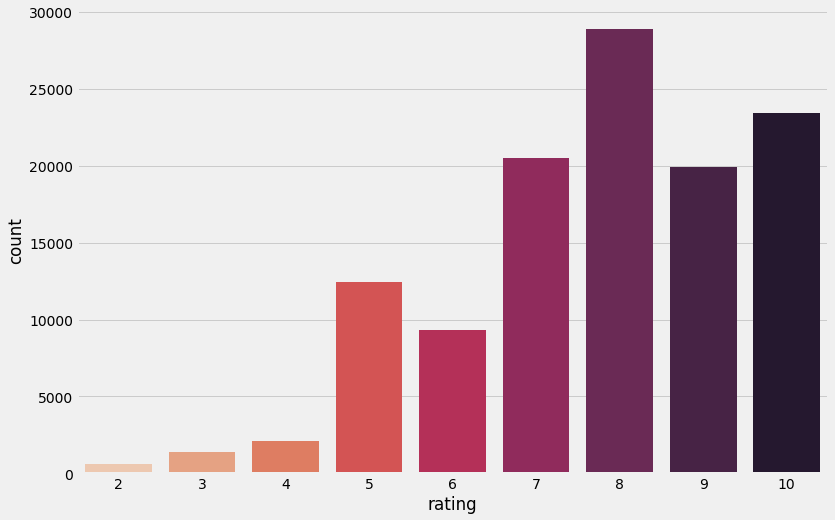

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[~(ratings['user_id'].isin(heavy_users_list))&(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

heavy 유저들이 상대적으로 10점을 잘 안주는 것으로 보여집니다.

이번에는 가장 인기 있는 책은 몇번 읽혔는지 알아보겠습니다.

In [ ]:
ratings.groupby('isbn')['rating'].count().sort_values(ascending=False)

isbn
0312195516    303
0060928336    280
059035342X    269
0671027360    257
0446672211    252
             ... 
0439164524      1
0449221156      1
1558211853      1
0449220850      1
0385495056      1
Name: rating, Length: 20871, dtype: int64

가장 인기있는 책은 2502번 읽혔습니다. 

데이터 merge 이후 해당 책이 무엇인지 알아보겠습니다.

현재 점수는 1~10점으로 분류되어 있으며 1점이 가장 많습니다.

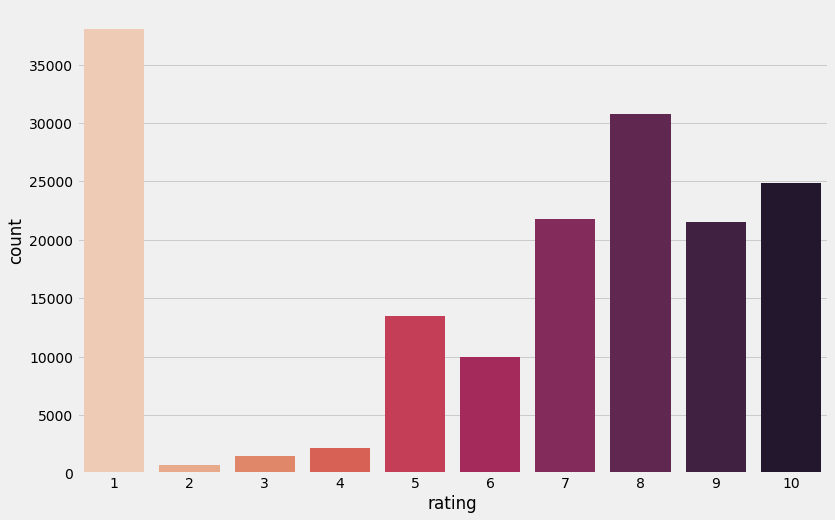

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings , x='rating', palette='rocket_r')
plt.show()


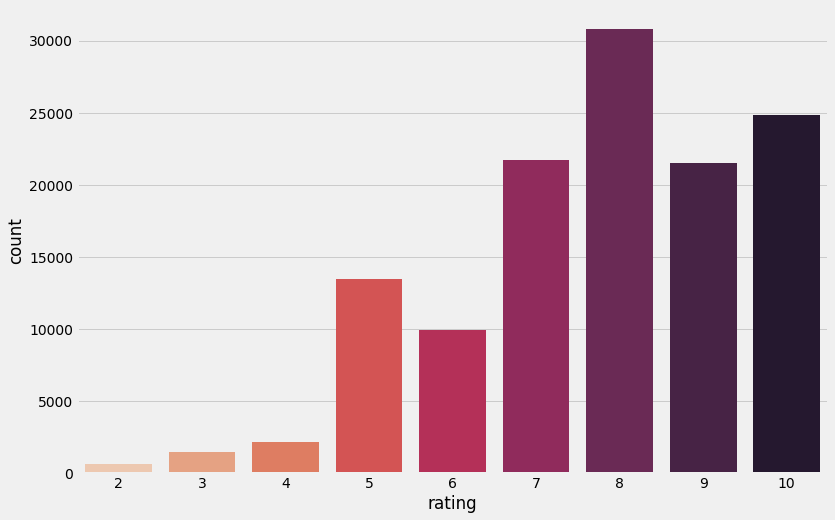

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings[(ratings['rating']>1)] , x='rating', palette='rocket_r')
plt.show()

# (5) 파일 merge

이제 세 파일을 모두 합쳐서 컬럼간의 관계를 살펴보도록 하겠습니다.

In [ ]:
merge1 = ratings.merge(books, how='left', on='isbn')
data = merge1.merge(users, how='inner', on='user_id')
print('merge 결과 shape: ', data.shape)

merge 결과 shape:  (164729, 17)


In [ ]:
ratings.shape
# ratings 기록 갯수만큼 결과가 나온것을 확인 할 수 있습니다.

(164729, 3)

In [ ]:
set(ratings['isbn']) - set(books['isbn']) 

set()

## (5-1) 시각화

In [ ]:
popular_book_list = data['book_title'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['book_title'].isin(popular_book_list)]

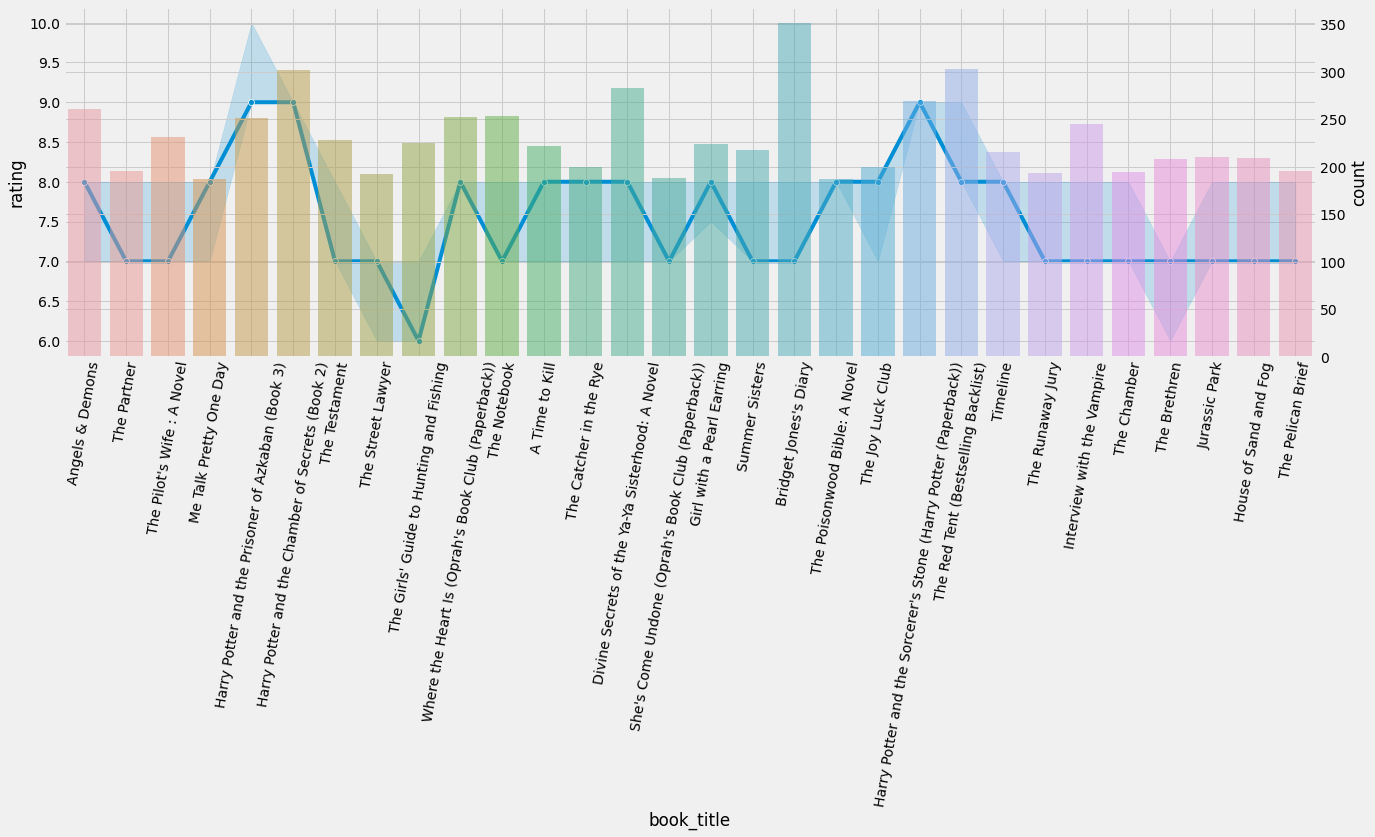

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,6))
plt.xticks(rotation=80)
sns.lineplot(data = popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1)
ax2 = ax1.twinx()

sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax2)
plt.show()

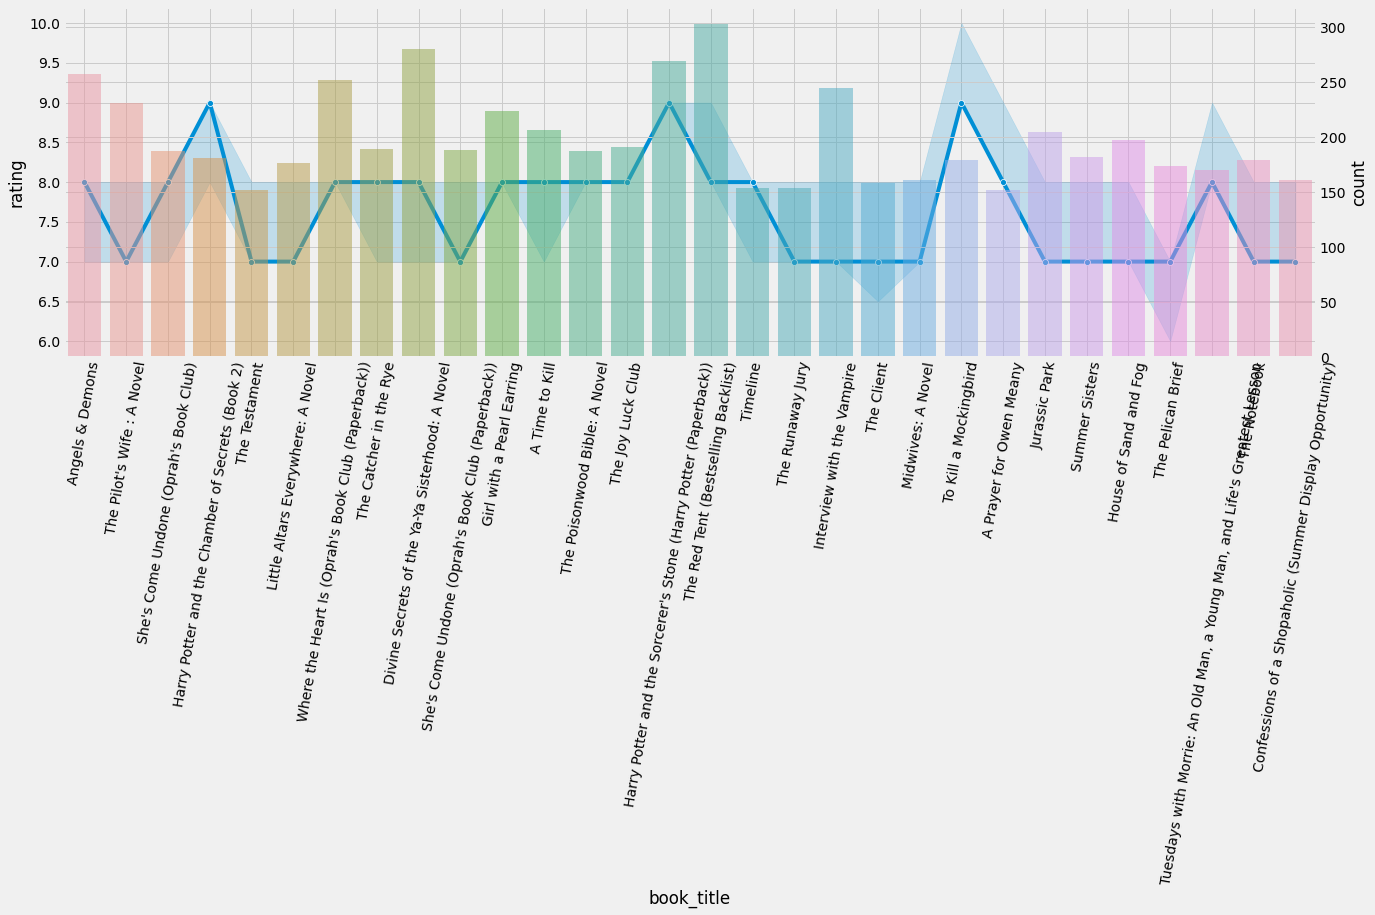

In [ ]:
popular_book_list = data['isbn'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['isbn'].isin(popular_book_list)]

fig, ax1 = plt.subplots(figsize=(20,6))
plt.xticks(rotation=80)
sns.lineplot(data = popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1)
ax2 = ax1.twinx()

sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax2)
plt.show()

book_title을 사용했을때와 isbn을 사용한 결과에 차이가 있는 것을 볼 수 있습니다.

이는 isbn이 책 고유번호로써 특정 국가에서 인기 차이가 반영되기 때문이라고 생각할 수 있습니다.

또한 가장 많이 읽힌 책이 오히려 median 및 평균이 낮은 것을 확인 할 수 있는데 이는 rating 1이 많아서 그런것일수도 있으므로 이를 제외해 보겠습니다.

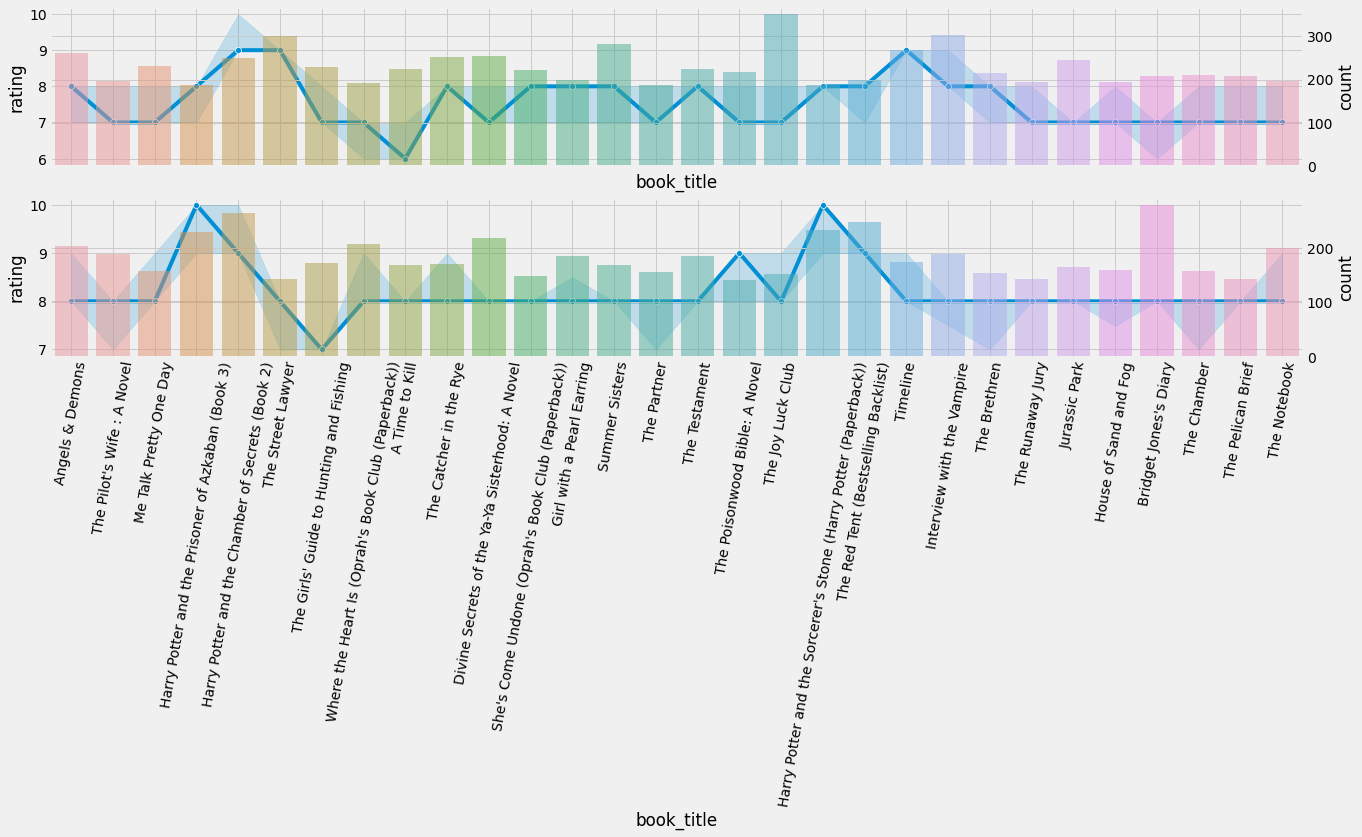

In [ ]:
# book title을 사용했을떄
popular_book_list = data['book_title'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['book_title'].isin(popular_book_list)]
fig, ax1 = plt.subplots(2,1, figsize=(20,6))
plt.xticks(rotation=80)
plot1 = sns.lineplot(data = popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[0])
plot1 = sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax1[0].twinx())
plot1.set_xticklabels([])


plot2 = sns.lineplot(data = popular_book[popular_book['rating']>1],x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[1])
plot2 = sns.countplot(data=popular_book[popular_book['rating']>1], x='book_title', alpha=0.5, ax=ax1[1].twinx())
plt.show()

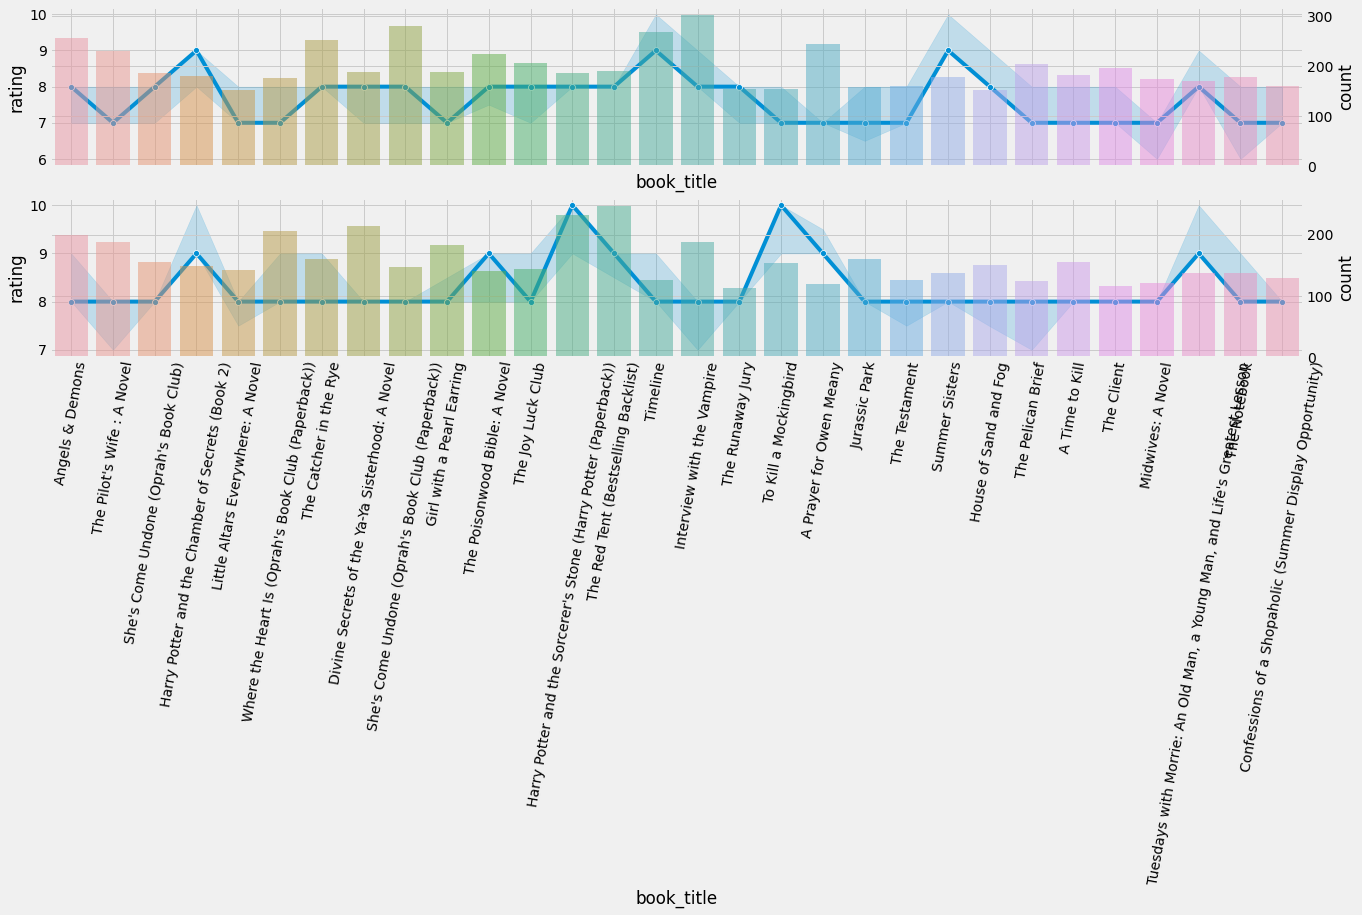

In [ ]:
# isbn을 사용했을 때
popular_book_list = data['isbn'].value_counts().sort_values(ascending=False)[:30].index
popular_book = data[data['isbn'].isin(popular_book_list)]
fig, ax1 = plt.subplots(2,1, figsize=(20,6))
plt.xticks(rotation=80)
plot1 = sns.lineplot(data=popular_book,x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[0])
plot1 = sns.countplot(data=popular_book, x='book_title', alpha=0.5, ax=ax1[0].twinx())
plot1.set_xticklabels([])

plot2 = sns.lineplot(data = popular_book[popular_book['rating']>1],x='book_title',y='rating' ,marker='o', estimator=np.median, ax=ax1[1])
plot2 = sns.countplot(data=popular_book[popular_book['rating']>1], x='book_title', alpha=0.5, ax=ax1[1].twinx())
plt.show()


많이 읽힌 책들은 중앙값 8점대를 형성하고 있음을 확인할 수 있습니다.

다음으로 book cate 별 rating 차이를 알아보겠습니다

앞서 만든 상위 카테고리를 활용하여 살펴보겠습니다.

In [ ]:
popular_cate_list = data['category_high'].value_counts().sort_values(ascending=False)[:10].index
popular_cate = data[data['category_high'].isin(popular_cate_list)]

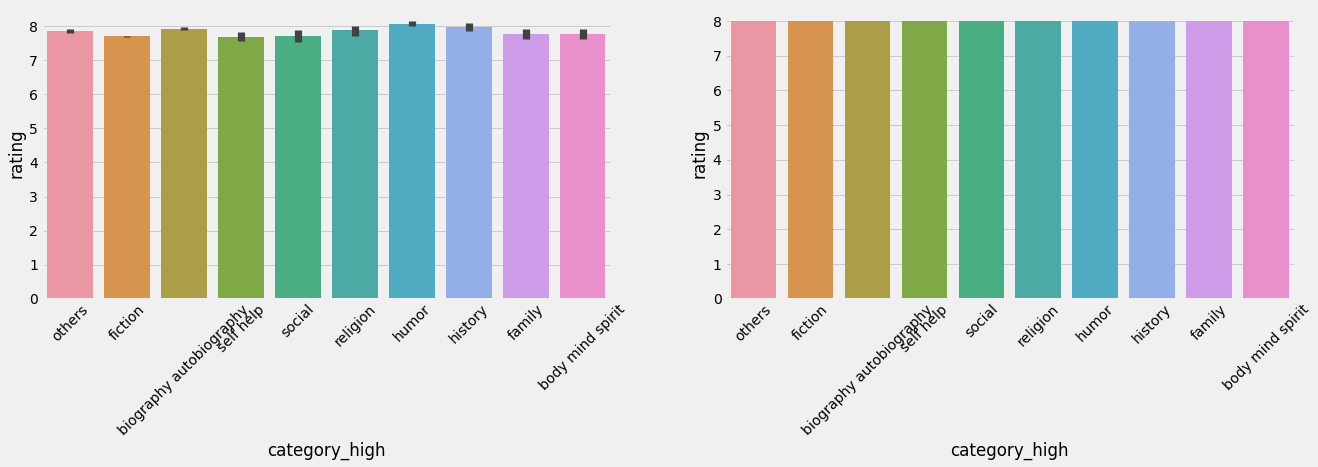

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot1 = sns.barplot(data=popular_cate[popular_cate['rating']>1], x='category_high', y='rating', estimator=np.mean, ax=ax[0], )
plot2 = sns.barplot(data=popular_cate[popular_cate['rating']>1], x='category_high', y='rating', estimator=np.median, ax=ax[1])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
plt.show()

카테고리 간 점수차이는 크게 없습니다.

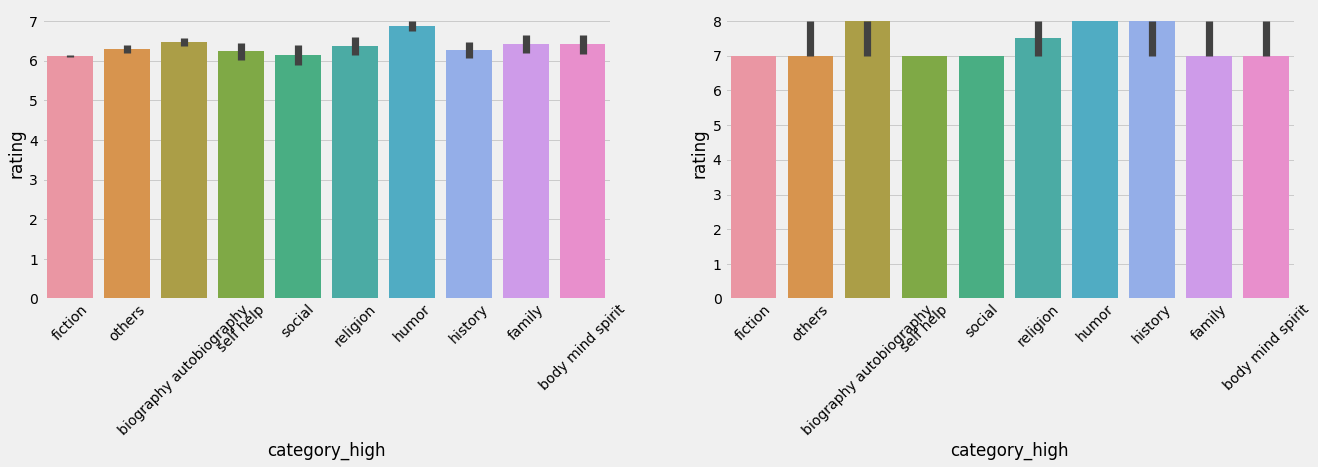

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot1 = sns.barplot(data=popular_cate, x='category_high', y='rating', estimator=np.mean, ax=ax[0], )
plot2 = sns.barplot(data=popular_cate, x='category_high', y='rating', estimator=np.median, ax=ax[1])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
plt.show()

본 미션은 여기까지 입니다.

대회 데이터를 이해하고 이를 바탕으로 간단한 Feature engineering을 수행하는 시간을 가져보았습니다.

미션을 따라오시면서 궁금했던 점들을 직접 해보시면 데이터를 더 잘 이해할 수 있게 될 것입니다.

본 미션을 통해 분석 아이디어를 얻어서 대회에서 다양한 시도를 많이 해보시며 실력을 쌓으시길 바라겠습니다.




# End of Document

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.